1) Mounting the google drive

In [1]:
#Importing the necessary libraries for conversion of json to csv as well
#This code converts JSON data stored in a file named "tesco.json" to CSV format and saves it as "tesco.csv" in my Google Drive.
#It utilises libraries like json and pandas, and mounts Google Drive to access and save the files.

import json
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

json_file_path = '/content/drive/My Drive/Colab Notebooks/tesco.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.to_csv('/content/drive/My Drive/Colab Notebooks/tesco.csv', index=False)


Mounted at /content/drive


2)Removing duplicate entries

In [2]:
#This code calculates and prints the original count of rows in df
#then removes duplicate entries in the 'text' column, and prints the count of rows after removal of duplicates.
# Printing the original count of rows
original_row_count = len(df)
print(f"Original count of rows: {original_row_count}")

# Removing duplicate entries in the 'text' column
df.drop_duplicates(subset='text', inplace=True)

# Printing the count of rows after removal of duplicates
new_row_count = len(df)
print(f"Count of rows after removal of duplicates: {new_row_count}")

Original count of rows: 96702
Count of rows after removal of duplicates: 72177


3)Converting the ‘created_at’ column to datetime format

In [3]:
#converting to datetime format for proper analysis
import pandas as pd

df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

df


,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,possibly_sensitive,extended_tweet,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-10-09 12:46:48,1314547865662951427,1314547865662951424,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]","<a href=""http://twitter.com/download/iphone"" r...",False,1.314314e+18,1.314314e+18,1.232803e+18,...,[{'tag': None}],None,None,None,NaN,NaN,None,None,None,None
1,2020-04-21 13:03:54,1252583841824456709,1252583841824456709,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.252584e+18,1.252584e+18,2.719861e+08,...,[{'tag': None}],None,None,None,NaN,NaN,None,None,None,None
2,2020-11-30 12:26:19,1333386877974556673,1333386877974556672,WHO WILL WIN?\n@researchlive UK Business Impac...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.333387e+18,1.333387e+18,1.304432e+08,...,[{'tag': None}],0.0,{'full_text': 'WHO WILL WIN? @researchlive UK ...,None,NaN,NaN,None,None,None,None
3,2020-04-16 19:07:30,1250863404694175745,1250863404694175745,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]","<a href=""http://twitter.com/download/iphone"" r...",False,1.250857e+18,1.250857e+18,5.974244e+08,...,[{'tag': None}],None,None,None,NaN,NaN,None,None,None,None
4,2020-12-22 11:34:32,1341346379478740993,1341346379478740992,Any comment @Tesco ? British carrots proudly d...,"[0, 98]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],1.0,None,None,NaN,NaN,None,None,"{'media': [{'id': 1341346375934611461, 'id_str...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96694,2020-05-27 17:41:25,1265699642760716289,1265699642760716289,"RT @stephen_boxall: Dear @Tesco, whilst your d...",None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,[{'tag': None}],None,None,{'created_at': 'Wed May 27 17:25:46 +0000 2020...,NaN,NaN,None,None,None,None
96695,2020-09-02 10:37:34,1301106991973249024,1301106991973249024,Also #EndLowPay for parents. @Tesco @LidlGB @s...,"[0, 69]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],False,None,None,1.300833e+18,1.300833e+18,{'created_at': 'Tue Sep 01 16:29:52 +0000 2020...,"{'url': 'https://t.co/qM4N89QYuF', 'expanded':...",None,None
96696,2020-07-28 23:26:18,1288254483894542337,1288254483894542337,"@Tesco All day breakfast, twix and an iced cof...","[7, 51]","<a href=""http://twitter.com/download/iphone"" r...",False,1.288233e+18,1.288233e+18,2.719861e+08,...,[{'tag': None}],None,None,None,NaN,NaN,None,None,None,None
96699,2020-03-15 17:34:33,1239243602519379969,1239243602519379969,@MichelleOwen7 @Tesco Robbing bastards. Can't ...,"[22, 108]","<a href=""http://twitter.com/download/android"" ...",False,1.239223e+18,1.239223e+18,3.585861e+07,...,[{'tag': None}],None,None,None,NaN,NaN,None,None,None,None


4)Removing stop words, RT, @ (Mentions)

In [4]:
#This code sets up text preprocessing for NLP tasks.
#It grabs necessary tools like Pandas for data handling, NLTK for language processing
#and regex for pattern matching. It then defines rules to clean up text data
#by removing things like mentions, retweets, hashtags, and links, and gets rid of common filler words.
#Finally, it applies these rules to the text data in the DataFrame.
# Importing necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Defining regex patterns to match mentions, retweets, hashtags, and links
mention_pattern = r'(?<!@Tesco)@[A-Za-z0-9_]+'
retweet_pattern = r'^RT'
hashtag_pattern = r'#([^\s]+)'
link_pattern = r'https?://[^\s]+'

#Here we are going to doenload the NLTK stopwords list
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Defining a function to remove stop words from text
def delete_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Defining a function to preprocess text
def preprocess_text(text):
    text = re.sub(mention_pattern, '', text)
    text = re.sub(retweet_pattern, '', text)
    text = re.sub(hashtag_pattern, '', text)
    text = re.sub(link_pattern, '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = delete_stopwords(text)
    return text

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


5)Distribution of positive and negative tweets throughout the year

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


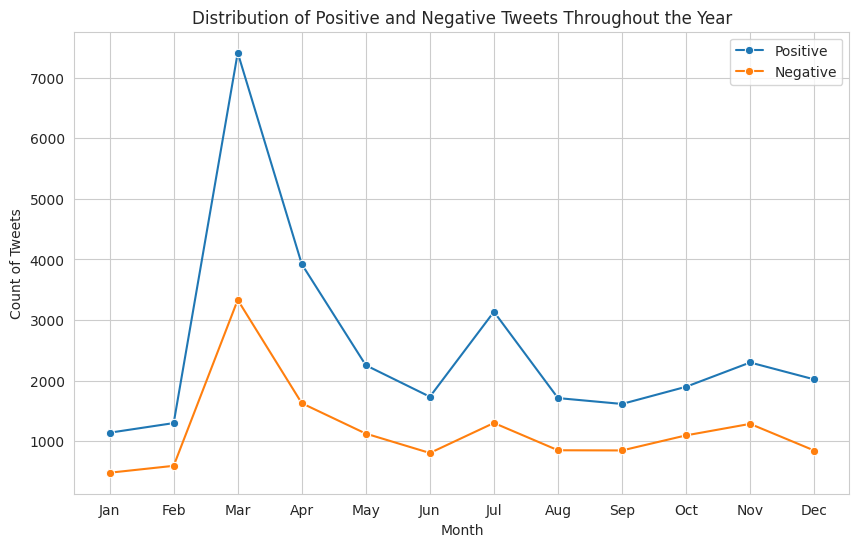

Month 1: Positive Tweets - 1138, Negative Tweets - 477
Month 2: Positive Tweets - 1297, Negative Tweets - 591
Month 3: Positive Tweets - 7415, Negative Tweets - 3332
Month 4: Positive Tweets - 3922, Negative Tweets - 1625
Month 5: Positive Tweets - 2252, Negative Tweets - 1123
Month 6: Positive Tweets - 1732, Negative Tweets - 803
Month 7: Positive Tweets - 3136, Negative Tweets - 1299
Month 8: Positive Tweets - 1710, Negative Tweets - 848
Month 9: Positive Tweets - 1613, Negative Tweets - 845
Month 10: Positive Tweets - 1897, Negative Tweets - 1094
Month 11: Positive Tweets - 2298, Negative Tweets - 1284
Month 12: Positive Tweets - 2019, Negative Tweets - 844


In [11]:
#This code employs NLTK's Vader module for sentiment analysis on tweets
# byvisualizing the distribution of positive and negative sentiments over the
# months. It setsthresholds to categorise tweets as positive or negative, then
# it prints counts of positive and negative tweets for each month. importing
# neccesary libraries
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Extracting month from 'created_at' column
df['created_at'] = pd.to_datetime(df['created_at'])
df['month'] = df['created_at'].dt.month

senti = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    scores = senti.polarity_scores(tweet)
    return scores['compound']

df['sentiment'] = df['text'].apply(get_sentiment)

#Setting threshold
threshold_positive = 0.05
threshold_negative = -0.05

df['positive'] = df['sentiment'] > threshold_positive
df['negative'] = df['sentiment'] < threshold_negative

#Creating line chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(data=df.groupby('month')['positive'].sum(), marker='o', label='Positive')
sns.lineplot(data=df.groupby('month')['negative'].sum(), marker='o', label='Negative')

plt.title('Distribution of Positive and Negative Tweets Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Count of Tweets')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

positive_counts = df.groupby(['month'])['positive'].sum()
negative_counts = df.groupby(['month'])['negative'].sum()

for month in range(1, 13):
    print(f"Month {month}: Positive Tweets - {positive_counts.get(month, 0)}, Negative Tweets - {negative_counts.get(month, 0)}")

6)Applying sentiment distribution in tweets with Vader

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


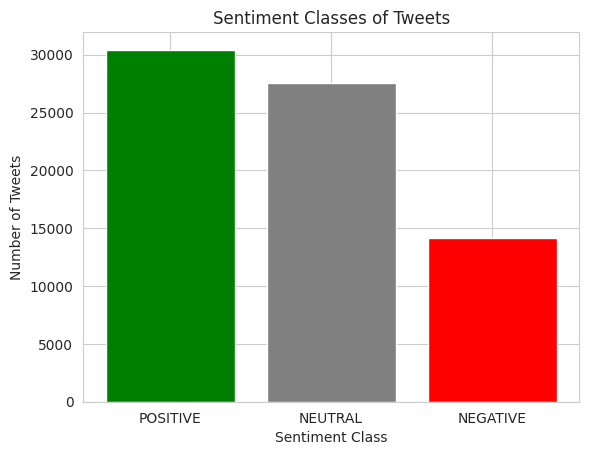

sentiment
POSITIVE    30429
NEUTRAL     27583
NEGATIVE    14165
Name: count, dtype: int64


In [12]:
#This code uses NLTK's Vader module to assess sentiment in tweets.
#It starts by setting up the SentimentIntensityAnalyzer and creating a function
# in order to classify tweets as positive, negative, or neutral based on their compound scores.
#Once applied to the tweet dataset, it generates a bar chart showing the distribution of sentiment classes (positive, negative, neutral)
#and prints the counts for each sentiment class.
#Initialising the Sentiment Analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

#Defining a function and setting limits
def predict_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.05:
        return 'POSITIVE'
    elif score < -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

df['sentiment'] = df['text'].apply(predict_sentiment)

# Creating bar graph
sentiment_counts = df['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Classes of Tweets')
plt.show()

print(sentiment_counts)


7) Total tweet favourite count by sentiment

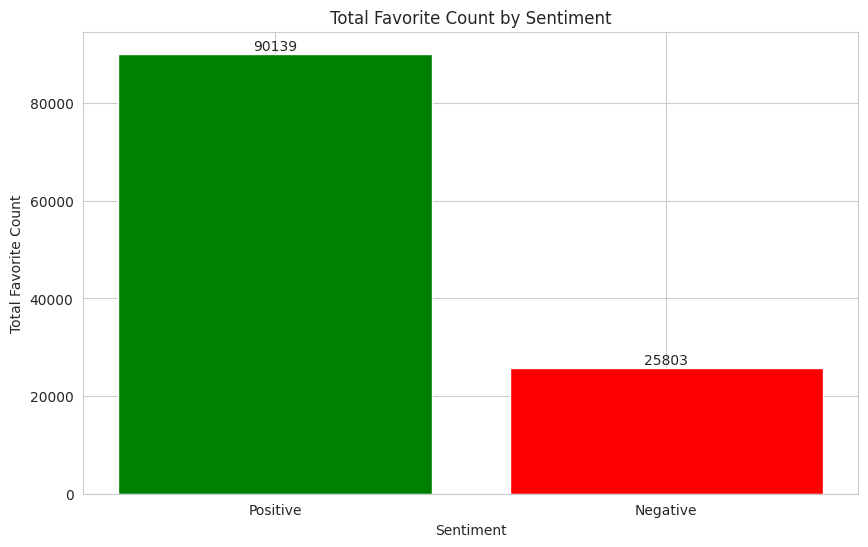

In [7]:
# This code segment filters tweets into positive and negative categories based on sentiment.
# Then, it calculates the total favorite counts for each category. Using Matplotlib,
# it then creates a bar chart visualising the total f total favorite counts for positive and
# negative tweets, with bars colored green and red respectively. Each bar is
# labelled with its total favorite count, and the chart includes axis labels and
# a title.
import matplotlib.pyplot as plt

# Filtering positive and negative tweets
positive_tweets = df[df['sentiment'] == 'POSITIVE']
negative_tweets = df[df['sentiment'] == 'NEGATIVE']

# Calculating total favorite counts for positive and negative tweets
positive_favorite_count = positive_tweets['favorite_count'].sum()
negative_favorite_count = negative_tweets['favorite_count'].sum()

plt.figure(figsize=(10, 6))
plt.bar(['Positive', 'Negative'], [positive_favorite_count, negative_favorite_count], color=['green', 'red'])
plt.text(0, positive_favorite_count, str(positive_favorite_count), ha='center', va='bottom')
plt.text(1, negative_favorite_count, str(negative_favorite_count), ha='center', va='bottom')
plt.xlabel('Sentiment')
plt.ylabel('Total Favorite Count')
plt.title('Total Favorite Count by Sentiment')
plt.show()


8) Tweet density by month

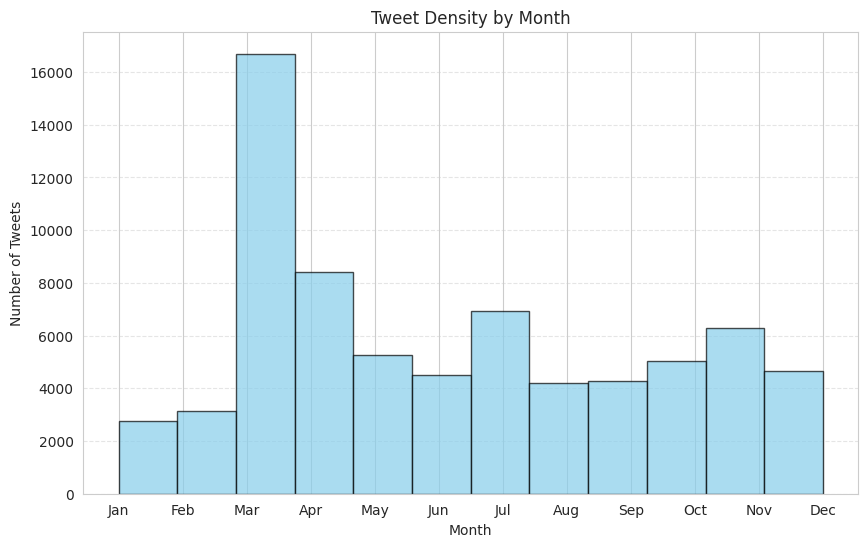

In [13]:
#This code converts the 'created_at' column to datetime
#format and extracts the month from it. It then visualises the density of tweets by month using a histogram.
import pandas as pd
import matplotlib.pyplot as plt

df['created_at'] = pd.to_datetime(df['created_at'])

# Extracting the month from the 'created_at' column
df['month'] = df['created_at'].dt.month

#visualisation
plt.figure(figsize=(10, 6))
df['month'].hist(bins=12, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Tweet Density by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

9) Word cloud

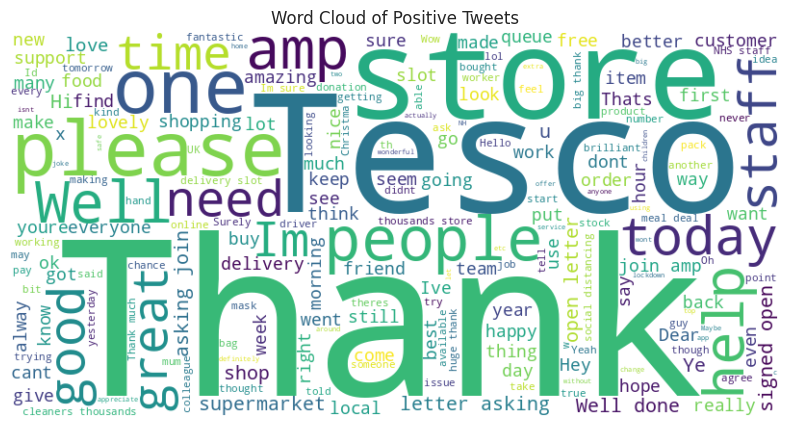

In [9]:
#This code creates a word cloud visualisation from positive tweets.
#It then defines a function to filter positive tweets based on sentiment prediction.
#Then, positive tweets are filtered from the DataFrame using this function.
#Next all of the positive tweets are combined into a single string.
# Using the WordCloud library aa word cloud is generated from the combined positive tweets text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def filter_positive_tweets(text):
    return predict_sentiment(text) == 'POSITIVE'

#Filtering positive tweets
positive_tweets = df[df['text'].apply(filter_positive_tweets)]

#Combining all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets['text'])

#Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

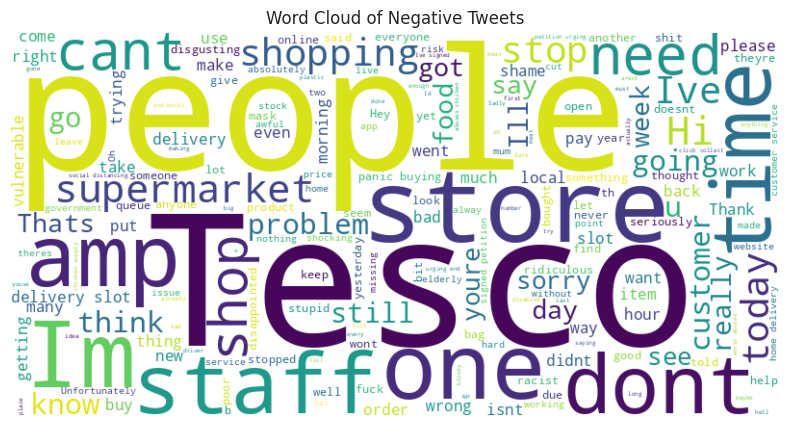

In [15]:
#similarly we are creating the negative word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def filter_negative_tweets(text):
    return predict_sentiment(text) == 'NEGATIVE'

# Filtering negative tweets
negative_tweets = df[df['text'].apply(filter_negative_tweets)]

# Combining all negative tweets into a single string
negative_tweets_text = ' '.join(negative_tweets['text'])

# Generating a word cloud for negative tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()

10)Negative word count bar graph

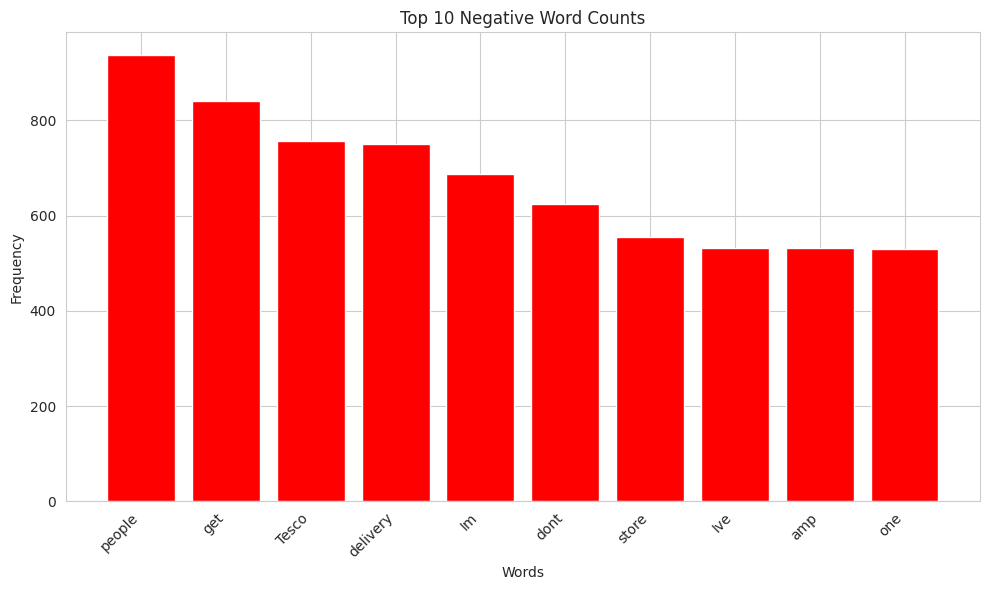

In [16]:
#This code makes a bar chart showing the most frequent negative words in a bunch of negative tweets.
#It filters out non-alphabetic words and then it counts how often each word appears
# after which it picks out the top 10 negative words, and then plots them on the graph.

from collections import Counter
import re
import matplotlib.pyplot as plt

def is_valid_word(word):
    # Excluding tokens that are empty or contain only special characters
    return re.match(r'^[a-zA-Z]+$', word)

negative_tokens = [word for word in negative_tweets_text.split() if is_valid_word(word)]

# Counting the occurrences of each word
word_counts = Counter(negative_tokens)

# Getting the top 10 negative words
top_negative_words = word_counts.most_common(10)

# Extracting words and their counts
words = [word[0] for word in top_negative_words]
counts = [word[1] for word in top_negative_words]

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Word Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11)LDA for topic modelling

In [17]:
#This code will analyse a collection of tweets to uncover their main topics.
#It will help in gathering all the text from the tweets and  then processes it to highlight key words.
#Then, it will employ a method called Latent Dirichlet Allocation (LDA) to identify common themes or subjects within the tweets.
#Finally, it will print out the top 10 words associated with each topic, giving us an insight into the prevalent discussions happening on twitter.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tweets_all = df['text']

# Preprocessing text data

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(tweets_all)

# Applying LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])


Topic 1:
['tesco', 'amp', 'open', 'use', 'asking', 'letter', 'join', 'signed', 'yes', 'dont']
Topic 2:
['thats', 'food', 'ive', 'supermarkets', 'think', 'day', 'hi', 'dont', 'im', 'buy']
Topic 3:
['delivery', 'im', 'shopping', 'today', 'online', 'order', 'slot', 'slots', 'home', 'store']
Topic 4:
['people', 'staff', 'stores', 'way', 'store', 'customers', 'need', 'customer', 'shop', 'stop']
Topic 5:
['thank', 'thanks', 'people', 'great', 'know', 'good', 'like', 'help', 'work', 'staff']
